# ENGG 27.02 LAB ACTIVITY 2


## Bisection Method
1. Given \$f(x)=−2x^6−1.5x^4+10x+2\$ Use bisection to determine the maximum of this function. Employ initial guesses of \$x_l=0\$ and \$x_u=1\$ , and perform iterations until the approximate relative error falls below \$5%\$.

In [1]:
#johnrel code

## Secant Method
2. Use the secant method on the circle function \$(x+1)^2+(y−2)^2=16\$  to find a positive real root. Set your initial guess to \$x_i=3\$  and \$x_i−1 =0.5\$. Approach the solution from the first and fourth quadrants. When solving for \$f(x)\$  in the fourth quadrant, be sure to take the negative value of the square root. Why does your solution diverge?

In [2]:
using Plots
function plot_circle(h, k, r)
#= Takes an input  of (h, k) or the center of the circle and r or the radius of the circle and plots the points of the circle =#
    x =[]; y=[]
    for i in 0:0.001:2*π
        append!(x, h .+ r*sin(i)) #parametric equation for circle
        append!(y, k .+ r*cos(i))
    end
    plot(x,y, seriestype=[:shape], fillalpha=0.2, aspect_ratio=1, color="red", label="f(x,y)")
end

plot_circle (generic function with 1 method)

In [3]:
function secant(f::Function, x0, x1)
#= Takes an input of the function, the first guess, and the second guess. Loop stops when x is reasonably close to zero.
    Plots the point of the root estimate after. =#
    x = 0.0; i = 1
    while true
        x = x1 - f(x1) * (x1-x0)/(f(x1)-f(x0))
        if abs(x-x1) < 1e-5
            println("term #$i: secant estimate of $x")            
            break
        end
        x0 = x1
        x1 = x
        i += 1
    end
    plot!([x],[f(x)], label="secant estimate: f(x) = $x", markershape = :circle)
end

secant (generic function with 1 method)

function: f(x,y) = (x+1)^2 + (y-2)^2 - 16 or f(x) = +-sqrt(16 - (x+1)^2)-2
term #7: secant estimate of 2.464101615137791


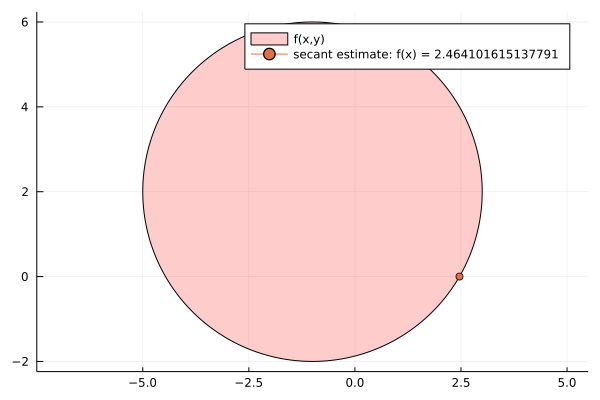

In [4]:
f(x) = sqrt(16 - (x+1)^2)-2 #isolating y
println("function: f(x,y) = (x+1)^2 + (y-2)^2 - 16 or f(x) = +-sqrt(16 - (x+1)^2)-2")
plot_circle(-1,2,4)
secant(f, 1, 2)

## Brent's Method
3. Determine the lowest real root of \$f(x)=−12−21x+18x^2−2.4x^3\$ using Brent’s method to a value of εs corresponding to three significant figures.

In [7]:
function brent(f::Function, sigfigs, x0, x1)
#= Takes an input of the function and the number of significant figures to compute for the value of the specified tolerance.
    Computes for the lowest possible =#
    x2 = x0; x3 = x1 - x2; x4 = x3
    while true
        if f(x1) == 0
            break
        end
        if sign(f(x0)) == sign(f(x1))
            #if necessary rearrange points
            x0 = x2; x3 = x1 - x2; x4 = x3
        end
        m = 0.5*(x0-x1) #termination test and possible exit
        tol = 2*eps()*max(abs(x1),1)
        if abs(m) <= tol || f(x1) == 0
            break
        end
        if abs(x4) >= tol && abs(f(x2)) > abs(f(x1))
            if x0 == x2
                #use secant method 
                x = x1 - f(x1) * (x1-x0)/(f(x1)-f(x0))
            else
                #use inverse quadratic interpolationl
                x = x0*f(x1)*f(x2) / ((f(x0)-f(x1))*(f(x0)-f(x2))) +
                    x1*f(x0)*f(x2) / ((f(x1)-f(x0))*(f(x1)-f(x2))) + 
                    x2*f(x0)*f(x1) / ((f(x2)-f(x0))*(f(x2)-f(x1)))
            end
            println(x)
            
        else 
            #bisection method
            x3 = m; x4 = m
        end
        x2 = x1
        if abs(f(x3)) > tol
            x1 = x1 + x3
        else
            x1 = x1 - sign(x1 - x0)*tol
        end
    end
end

f(x) = -12 - 21x + 18x^2 - 2.4x^3
brent(f, 3, 0 , 1)

-294.96990740772605
-20.293635170603142
-10.130735492577458
-6.5849706413732685
-4.78722954699107
-3.7046311254712565
-2.9841588576528184
-2.472325161535527
-2.091654278163222
-1.7988116068824485
-1.5676635392233662
-1.3815131733709676
-1.2291934275315746
-1.1029527172846851
-0.9972418158799028
-0.9079834925423169
-0.8321147246919343
-0.7672897536802202
-0.7116817001503354
-0.6638465741097836
-0.6226279253061724
-0.5870886366242397
-0.5564612542114982
-0.530111231547435
-0.5075093329403678
-0.4882106396927978
-0.471838386548609
-0.4580713796937816
-0.4466341033833045
-0.43728886793935123
-0.42982952402504326
-0.42407639039953593
-0.41987213034680065
-0.41707837601667
-0.4155729470477672
-0.4152475448802152
-0.41536545862720436
-0.4153599668652777
-0.41536075325788796
-0.41536069647668655
-0.4153587994391137
-0.4153607191484393
-0.41536070776692713
-0.4153607091911628
-0.415360709014431
-0.41536070903689565
-0.41536070903418787
-0.4153607090345499
-0.41536070903451144
-0.415360709034517